# Предсказание оттока сотрудников 

Ключ к успеху любой организации - это привлечение и удержание лучших сотрудников. Для HR-аналитиков одной из задач является 
предотвращение ухода персонала. Для этого им необходимо знать факторы, увеличивающие вовлеченность сотрудников, и, наоборот, побуждающие сотрудников уйти. 

Обзор методов балансировки 

https://basegroup.ru/community/articles/imbalance-datasets

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6" 
alt="IMAGE ALT TEXT HERE" width="500" border="0" /></a>

Мы попробуем на данных из Kaggle обучить модель машинного обучения, которая будет предсказывать отток сотрудников.
https://www.kaggle.com/patelprashant/employee-attrition

**Бизнес-постановка задачи** 

Очевидно, компании не выгодно терять своих сотрудников. На данный момент HR-ы "вручную" отслеживают комфортность рабочей среды, лично наблюдая за сотрудниками и общаясь с ними. Мы предлагаем построить модель, которая будет прогнозировать возможность ухода сотрудника, а также позволит выявить причины этого. 

Такая модель позволит одновременно улучшить контроль над текучкой кадров и сократить штат HR-ов. 

**Постановка задачи анализа данных** 

Целью данной задачи является построение модели *классификации сотрудников*: на вход модель будет принимать данные о сотруднике, а на выходе она должна работать в двух режимах:

* выдавать вероятность ухода для данного сотрудника,
* выдавать правильный с точки зрения модели класс сотрудника (не доволен и собирается уйти или всё устраивает и остается).

Обучать модель мы будем по данным с платформы kaggle.

**Обзор доступных данных**

В выборке 4410 исторических наблюдений и 20 переменных, одна из которых - целевая. 
Таким образом, про каждого из 4410 сотрудников мы знаем значения 20 их характеристик (возраст, пол, место и область работы, расстояние от дома и т.д.), в том числе значение целевой переменной: ушел сотрудник или нет.

Выборка была разбита на две части для обучения и для тестирования модели.
В обучающей выборке 3308 сотрудников, в тестовой выборке - 1102.

**Доступные признаки**

Данные содержат два типа переменных:

* Целевая: **Attrition**, ушел работник или нет
* Остальные переменные: 19 переменных, могут использоваться для прогноза целевой переменной.

| Имя столбца       | Значение                | Имя столбца             | Значение
|:-----------------:|:-----------------------:|:-----------------------:|:---------------------------------------------:|
| Age               | Возраст                 | NumCompaniesWorked      | Кол-во компаний, в которых работал сотрудник  |
| BusinessTravel    | Частота командировок    | PercentSalaryHike       | Процент повышения з/п за время работы         |
| Department        | Отдел                   | StandardHours           | Стандартная продолжительность рабочего дня    |
| DistanceFromHome  | Расстояние от дома в км | StockOptionLevel        | Уровень опциона на акции                      |
| Education         | Уровень образования     | TotalWorkingYears       | Общий трудовой стаж                           |
| EducationField    | Сфера образования       | TrainingTimesLastYear   | Общее время дополнительного обучения          |
| Gender            | Пол                     | YearsAtCompany          | Стаж работы в данной компании                 |
| JobRole           | Должностная роль        | YearsSinceLastPromotion | Кол-во лет с последнего повышения             |
| MaritalStatus     | Семейное положение      | YearsWithCurrManager    | Кол-во лет работы с текущим менеджером        |
| MonthlyIncome     | Ежемесячный доход       | Attrition               | **Целевая переменная:** ушел работник или нет |

	


## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. Обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Загрузить и предобработать данные для тестирования
  5. Провалидировать модель на тестовой выборке

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки** 

Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных. 

Основная нагрузка по обработке входных данных ложится на модуль **pandas**. С
помощью функций `pandas.read_*` можно подтягивать данные из простых текстовых
файлов `CSV`, таблиц **Excel**, таблиц **HTML**, а также **SQL** запросами
из корпоративных баз данных и прочих распределённых хранилищ.

In [182]:
import pandas as pd

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах. 

Оснвные методы для построения:
* plot() - графики
* semilogy() - график логарифметический
* hist() - гистограммы

In [183]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt

Основную вычислительную нагрузку берёт на себя модуль **Numpy**, с помощью которого можно быстро производить
вычисления сразу над массивами чисел.

In [184]:
import numpy as np

Библиотека **scikit-learn** -- де факто наиболее популярный, разносторонний, хорошо
документированный и постоянно обогащающийся инструмент для построения моделей машинного
обучения.

Выберем из него несколько готовых функции для расчёта метрик качества классификации.

In [185]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score # метрики качества

Будем использовать библиотеку **MatplotLib**, которая отлично справляется с этой задачей.
Модуль **seaborn** устанавливет "приятные для глаз" палитры и стили для графиков.

In [186]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid') # установить стиль whitegrid, другие стили можно найти в документации к seaborn

Некоторые библиотеки могут выводить на экран предупреждения, которые важно учитывать в "боевых" задачах. Но в учебной тетради мы укажем Python'у игнорировать их.

In [187]:
import warnings
warnings.filterwarnings("ignore")

**Шаг 1.2. Загрузим данные**

Для решения задачи мы будем использовать данные. Они состоят из двух частей: часть для обучения и часть для тестирования модели. Загружаем данные с помощие команды !wget. Для того, чтобы игнорировать сообщения в процессе загрузки используем магическую команду %%capture в первой строке.



Наши данные в формате `csv` - comma separated values, значения, разделенные точкой. Обычно data scientists работают с табличными данными, которые представлены именно в таком виде. Чтобы загрузить такие данные, будем использовать функцию **`pd.read_csv()`** из библиотеки `pandas`.

In [188]:
training_data = pd.read_csv('training_data_employee.csv')

Посмотрим на 10 случайно выбранных записей из обучающего набора, для этого будем использовать функцию **sample()**. Параметр
**random_state=123** фиксирует "случайность", то есть на любом компьютере метод **sample()** будет работать одинаково. 

In [189]:
training_data.sample(10, random_state=123)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1930,45,Non-Travel,Sales,2,3,Medical,Female,Sales Executive,Married,66440,1.0,12,8,0,9.0,3,9,0,8,0
909,35,Travel_Rarely,Research & Development,9,3,Life Sciences,Male,Manager,Divorced,173990,6.0,12,8,0,7.0,3,2,2,2,1
222,30,Travel_Frequently,Research & Development,9,3,Other,Male,Healthcare Representative,Married,68250,1.0,14,8,0,1.0,2,1,0,0,1
2307,33,Travel_Rarely,Research & Development,9,3,Medical,Female,Manufacturing Director,Married,28990,1.0,17,8,0,15.0,3,15,5,7,0
576,34,Travel_Rarely,Sales,1,1,Marketing,Female,Laboratory Technician,Married,24760,1.0,19,8,0,6.0,2,6,1,3,0
1984,56,Travel_Frequently,Research & Development,1,2,Life Sciences,Female,Manufacturing Director,Married,52280,2.0,11,8,0,18.0,4,5,0,3,0
2984,28,Travel_Rarely,Research & Development,9,3,Medical,Male,Sales Representative,Single,46480,0.0,23,8,2,9.0,2,8,0,7,0
2942,32,Travel_Frequently,Research & Development,17,4,Other,Male,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,0
43,18,Travel_Rarely,Sales,7,3,Life Sciences,Male,Research Scientist,Single,38120,1.0,15,8,0,0.0,3,0,0,0,0
2880,38,Travel_Rarely,Sales,8,2,Marketing,Male,Research Scientist,Married,49300,9.0,14,8,0,14.0,0,1,0,0,0


**Упражнение:** выведите на экран те строчки из таблицы `training_data`, для котрых возраст сотрудника (Age) не больше 35 и не меньше 25, для которых сотрудник мужчина(Male) и работает в отделе продаж (Sales). Также проверьте размерность полученной выборки

In [190]:
traning_data_mid_age_male_sales = training_data[(training_data['Age'] >= 25) & (training_data['Age'] <= 35)
                                                & (training_data['Gender'] == 'Male') & (training_data['JobRole'].str.find('Sales') >= 0)]
traning_data_mid_age_male_sales.shape

(220, 20)

In [191]:
traning_data_mid_age_male_sales.sample(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,0
2245,31,Travel_Frequently,Sales,2,3,Medical,Male,Sales Executive,Single,25720,1.0,13,8,3,10.0,3,10,4,7,1
3261,34,Travel_Rarely,Sales,2,3,Marketing,Male,Sales Representative,Single,103120,1.0,12,8,0,6.0,2,6,1,3,0
1622,30,Travel_Rarely,Sales,25,3,Marketing,Male,Sales Executive,Single,24060,2.0,20,8,1,11.0,5,5,0,2,0
2594,31,Non-Travel,Sales,23,1,Medical,Male,Sales Executive,Divorced,38670,1.0,11,8,1,4.0,4,4,2,3,0


**Шаг 1.3. Посмотрим общую статистику по данным**

Посмотрим на технические параметры загруженных данных для обучения. Для этого вызовем метод **`describe()`** для набора данных *`training_data`*

Для удобства отображения мы транспонируем результат: меняем местами столбцы и строки.

In [192]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3308.0,36.879383,9.146506,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,3308.0,9.201935,8.078147,1.0,2.0,7.0,14.0,29.0
Education,3308.0,2.918380,1.024933,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,3308.0,64594.903265,46744.260986,10090.0,29040.0,49070.0,83210.0,199990.0
NumCompaniesWorked,3293.0,2.703310,2.506197,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,3308.0,15.230048,3.672812,11.0,12.0,14.0,18.0,25.0
StandardHours,3308.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,3308.0,0.804716,0.860350,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,3301.0,11.283248,7.791024,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,3308.0,2.801995,1.290718,0.0,2.0,3.0,3.0,6.0


Обратим внимание на общие статистики показателей в данных:
* **count** -- количество значений, которые не являются пропущенными (`NaN`);
* **mean**, **std** -- среднее и разброс данных в соответствующем поле;
* остальные статистики -- минимальное и максимальное значения, и квантили.

Из таких характеристик столбцов мы уже можем извлечь некоторую информацию о данных:
* У столбца **Attrition** среднее 0.160. Значит, в нашей выборке только 16% сотрудников ушли из компании.
* У столбца **MonthlyIncome** существенно отличается масштаб значений: минимальное значение дохода - 10090, максимальное - 199990.
* У столбцов **NumCompaniesWorked** и **TotalWorkingYears** есть пропуски.

## 2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно обратиться вызвать у переменной *training_data* метод **info()**.

Напомним, что в конце необходимо поставить скобочки.

In [193]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3308 non-null   int64  
 1   BusinessTravel           3308 non-null   object 
 2   Department               3308 non-null   object 
 3   DistanceFromHome         3308 non-null   int64  
 4   Education                3308 non-null   int64  
 5   EducationField           3308 non-null   object 
 6   Gender                   3308 non-null   object 
 7   JobRole                  3308 non-null   object 
 8   MaritalStatus            3308 non-null   object 
 9   MonthlyIncome            3308 non-null   int64  
 10  NumCompaniesWorked       3293 non-null   float64
 11  PercentSalaryHike        3308 non-null   int64  
 12  StandardHours            3308 non-null   int64  
 13  StockOptionLevel         3308 non-null   int64  
 14  TotalWorkingYears       

Как мы уже видели, пропусков в данных не так много: только у столбцов  **NumCompaniesWorked** и **TotalWorkingYears**. 

**Шаг 2.2. Заполнение пропусков**

Рассчитаем средние значения признаков в обучающей выборке, и заполним полученными
числами пропуски как в **тестовом наборе** данных, так и в **самой обучающей выборке**.

Мы будем заполнять средними значениями из обучающей выборки, так как при решении реальной задачи нам будут доступны только данные для обучения.

Для получения средних значений вызовем метод **`mean()`**. По умолчанию метод считает средним значения по столбцам. После выполнения ячейки средние значения записаны в переменной *`train_mean`*



In [194]:
train_mean = training_data.mean()
train_mean

Age                           36.879383
DistanceFromHome               9.201935
Education                      2.918380
MonthlyIncome              64594.903265
NumCompaniesWorked             2.703310
PercentSalaryHike             15.230048
StandardHours                  8.000000
StockOptionLevel               0.804716
TotalWorkingYears             11.283248
TrainingTimesLastYear          2.801995
YearsAtCompany                 6.998791
YearsSinceLastPromotion        2.187122
YearsWithCurrManager           4.118501
Attrition                      0.160218
dtype: float64

**Упражнение:** Найдите среднее значение переменной "Кол-во компаний, в которых работал сотрудник"(NumCompaniesWorked) среди тех сотрудников, у которых месячный доход (MonthlyIncome) находится между 80000 и 120000

In [195]:
training_data.loc[
  (training_data['MonthlyIncome'] >= 80000) 
  & (training_data['MonthlyIncome'] <= 120000), 
  'NumCompaniesWorked'
].mean()

2.1947115384615383

Пропуски в данных можно заполнять и разными методами:
* выборочной статистикой (среднее, медиана);
* прогнозами регрессии по известным признакам;
* случайными значениями.

Если относительно небольшая доля наблюдению имеет пропуски, то можно
вовсе исключить неполные наблюдения с пропущенными значениями из выборки.

Для заполнения средним значением, передадим на вход методу **`fillna()`** полученный ранее набор средних значений для каждого столбца. Опция `inplace=True` говорит, что мы запишем изменения прямо в существующий массив, а не создадим новый.

In [196]:
training_data.fillna(train_mean, inplace=True)

Убедимся, что пропусков больше нет

In [197]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3308 non-null   int64  
 1   BusinessTravel           3308 non-null   object 
 2   Department               3308 non-null   object 
 3   DistanceFromHome         3308 non-null   int64  
 4   Education                3308 non-null   int64  
 5   EducationField           3308 non-null   object 
 6   Gender                   3308 non-null   object 
 7   JobRole                  3308 non-null   object 
 8   MaritalStatus            3308 non-null   object 
 9   MonthlyIncome            3308 non-null   int64  
 10  NumCompaniesWorked       3308 non-null   float64
 11  PercentSalaryHike        3308 non-null   int64  
 12  StandardHours            3308 non-null   int64  
 13  StockOptionLevel         3308 non-null   int64  
 14  TotalWorkingYears       

**Шаг 2.3. Работаем с целевой переменной**

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать уход сотрудника, поэтому целевая переменная - это Attrition, факт ухода или не ухода сотрудника. 

Нам нужно выделить в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *training_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [198]:
target_variable_name = 'Attrition'

In [199]:
training_values = training_data[target_variable_name]

Чтобы посчитать количество сотрудников, которые уволились (значение переменной **Attrition** равно единице) и сотрудников, которые остались (значение **Attrition** равно нулю) вызовем метод **`value_counts()`**

In [200]:
training_values.value_counts()

0    2778
1     530
Name: Attrition, dtype: int64

**Упражнение:** посчитайте количество значений в других столбцах датафрейма training_data с помощью метода value_counts().

In [201]:
training_data.columns.value_counts()

StockOptionLevel           1
YearsSinceLastPromotion    1
Attrition                  1
Department                 1
JobRole                    1
PercentSalaryHike          1
NumCompaniesWorked         1
YearsWithCurrManager       1
StandardHours              1
Age                        1
Gender                     1
DistanceFromHome           1
TrainingTimesLastYear      1
BusinessTravel             1
MonthlyIncome              1
EducationField             1
TotalWorkingYears          1
MaritalStatus              1
YearsAtCompany             1
Education                  1
dtype: int64

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. Для это нужно у переменной *`training_data`* вызвать метод **`drop()`**.

In [202]:
training_points = training_data.drop(target_variable_name, axis=1)

In [203]:
training_points.shape

(3308, 19)

In [204]:
построить матрицу корреляций
Балансировка

SyntaxError: invalid syntax (<ipython-input-204-49d1598574ab>, line 1)

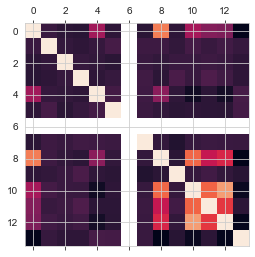

In [205]:
import matplotlib.pyplot as plt

plt.matshow(training_data.corr())

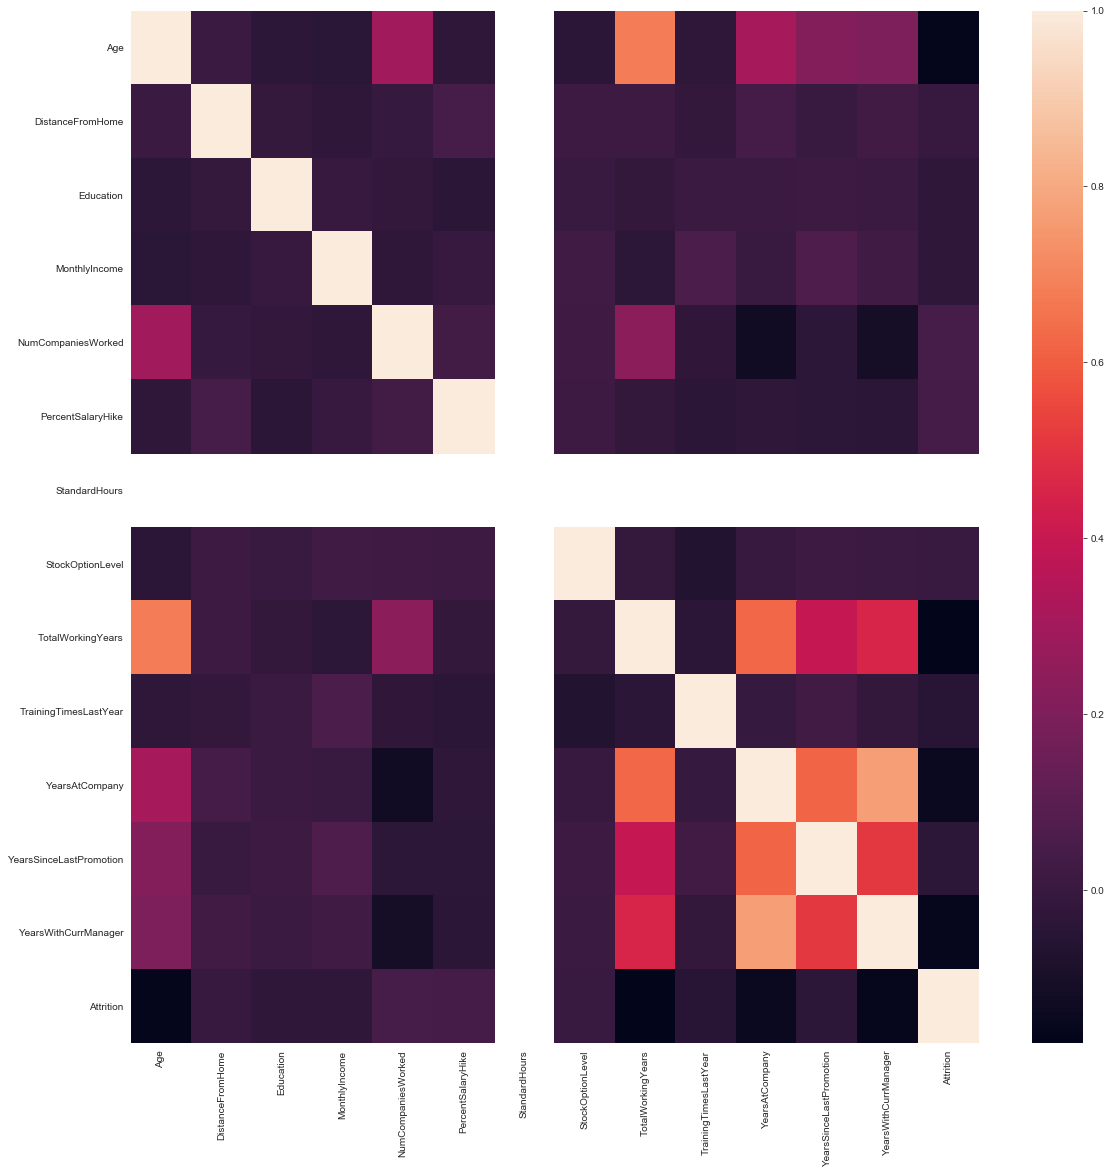

In [206]:
plt.figure(figsize=(19,19))
sns.heatmap(training_data.corr())

In [207]:
num_0 = len(training_data[training_data['Attrition']==0])
num_1 = len(training_data[training_data['Attrition']==1])
print(num_0,num_1)
# random undersample

2778 530


In [208]:
df_majority = training_data.loc[training_data.Attrition==0]
df_minority = training_data.loc[training_data.Attrition==1]

Видно, что столбца действительно нет, а количество строк не изменилось. 

In [209]:
print(training_data.columns.tolist())

['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [241]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = training_data.loc[training_data.Attrition==0]
df_minority = training_data.loc[training_data.Attrition==1]
 
# Upsample majority class
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=530,    # to match minority class
                                 random_state=1) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority, df_majority_upsampled])

In [242]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 1 to 2102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1060 non-null   int64  
 1   BusinessTravel           1060 non-null   object 
 2   Department               1060 non-null   object 
 3   DistanceFromHome         1060 non-null   int64  
 4   Education                1060 non-null   int64  
 5   EducationField           1060 non-null   object 
 6   Gender                   1060 non-null   object 
 7   JobRole                  1060 non-null   object 
 8   MaritalStatus            1060 non-null   object 
 9   MonthlyIncome            1060 non-null   int64  
 10  NumCompaniesWorked       1060 non-null   float64
 11  PercentSalaryHike        1060 non-null   int64  
 12  StandardHours            1060 non-null   int64  
 13  StockOptionLevel         1060 non-null   int64  
 14  TotalWorkingYears       

In [243]:
target_variable_name = 'Attrition'
training_values = df_upsampled[target_variable_name]
training_values.value_counts()

1    530
0    530
Name: Attrition, dtype: int64

In [244]:
training_points = df_upsampled.drop(target_variable_name, axis=1)
training_points.shape

(1060, 19)

## 3. Загрузить и предобработать данные для тестирования

**Шаг 3.1. Загрузим данные для тестирования**

Наши данные в формате `csv` - comma separated values, значения, разделенные точкой. Обычно data scientists работают с табличными данными, которые представлены именно в таком виде. Чтобы загрузить такие данные, будем использовать функцию **`pd.read_csv()`** из библиотеки `pandas`.

In [245]:
test_data = pd.read_csv('test_data_employee.csv')
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1102.0,37.057169,9.096386,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1102.0,9.164247,8.188807,1.0,2.0,7.0,14.0,29.0
Education,1102.0,2.896552,1.021213,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,1102.0,66333.330309,48028.087236,10090.0,29730.0,49385.0,84712.5,199990.0
NumCompaniesWorked,1098.0,2.669399,2.477794,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1102.0,15.147913,3.618613,11.0,12.0,14.0,18.0,25.0
StandardHours,1102.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,1102.0,0.761343,0.825476,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1100.0,11.270000,7.759277,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1102.0,2.791289,1.284292,0.0,2.0,3.0,3.0,6.0


**Шаг 3.2. Предобработка данных для тестирования**

Тестовые данные нужно предобработать аналогично обучающим. Поэтому заполним сперва пропуски в данных.

Для заполнения средним значеним, передадим на вход методу **`fillna()`** полученный ранее набор средних значений для каждого столбца. Опция `inplace=True` говорит, что мы запишем изменения прямо в существующий массив, а не создадим новы

In [246]:
test_data.fillna(train_mean, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1102 non-null   int64  
 1   BusinessTravel           1102 non-null   object 
 2   Department               1102 non-null   object 
 3   DistanceFromHome         1102 non-null   int64  
 4   Education                1102 non-null   int64  
 5   EducationField           1102 non-null   object 
 6   Gender                   1102 non-null   object 
 7   JobRole                  1102 non-null   object 
 8   MaritalStatus            1102 non-null   object 
 9   MonthlyIncome            1102 non-null   int64  
 10  NumCompaniesWorked       1102 non-null   float64
 11  PercentSalaryHike        1102 non-null   int64  
 12  StandardHours            1102 non-null   int64  
 13  StockOptionLevel         1102 non-null   int64  
 14  TotalWorkingYears       

**Шаг 3.3. Отделяем целевую переменную**

Нам нужно выделить в отдельную переменную *test_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *test_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [247]:
test_values = test_data[target_variable_name]

Отделим переменные для модели от выходной переменной (целевой). Для это нужно у переменной *`test_data`* нужно вызвать метод **`drop()`**.

In [248]:
test_points = test_data.drop(target_variable_name, axis=1)

И проверяем результат записанный в test_points

In [249]:
test_points.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,32,Travel_Rarely,Sales,10,3,Marketing,Female,Human Resources,Married,30720,5.0,12,8,0,9.0,4,5,1,3
1,52,Travel_Frequently,Research & Development,1,1,Life Sciences,Male,Laboratory Technician,Married,50060,3.0,16,8,1,31.0,2,9,0,0
2,37,Travel_Rarely,Sales,24,2,Life Sciences,Female,Laboratory Technician,Divorced,42570,4.0,15,8,0,9.0,2,1,0,0
3,28,Travel_Rarely,Research & Development,21,4,Life Sciences,Female,Healthcare Representative,Divorced,25000,1.0,16,8,2,6.0,3,5,0,4
4,22,Travel_Rarely,Research & Development,2,2,Life Sciences,Male,Sales Representative,Married,11020,6.0,19,8,0,4.0,3,2,2,2


## Шаг 4.  Обработать текстовые переменные

В наших данных 6 столбцов имеют значения типа object. В нашем случае, это текстовые признаки. Чтобы можно было подавать их на вход алгоритму, нам необходимо закодировать их.  

Мы рассмотрим два популярных метода кодирования категориальных признаков:
*  метод **get_dummies()** из библиотеки **pandas**
*  метод **LabelEncoder()** из библиотеки **sklearn**

Для начала нам необходимо определить какие из признаков категориальные

In [250]:
text_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

Далее нам необходимо преобразовать значения в выбранных колонках к числам, потому что наши алгоритмы не умеют работать с текстом.

Первый способ заключается в том, чтобы заменить признаки типа: 

|                 |       Отдел                   |  
|-----------------|-------------------------------|
|**Сотрудник 1**  |       Sales                   | 
|**Сотрудник 2**  |       RnD                     | 
|**Сотрудник 3**  |       HR                      | 

Признаками типа:

|                 | Отдел - Sales ? | Отдел - Rnd ? | Отдел - HR ? |
|-----------------|-----------------|---------------|--------------|
|**Сотрудник 1**  |       Да  (1)   |      Нет (0)  |      Нет (0) |
|**Сотрудник 2**  |       Нет (0)   |      Да  (1)  |      Нет (0) |
|**Сотрудник 3**  |       Нет (0)   |      Нет (0)  |      Да  (1) |

Таким образом, наши новые признаки говорят относится ли сотрудник к определённому отделу или нет. При таком подходе для каждого категориального признака появляется столько новых колонок, сколько есть возможных категорий. Одна из колонок будет заполнена `1`, а остальные `0`.

In [251]:
dummies = pd.get_dummies(data=training_points, columns=text_features)

В функцию **get_dummies()** в качестве параметров передаём:
*  **data** - исходные данные
*  **columns** - имена колонок, в которых находятся кагегориальные признаки

In [252]:
dummies.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1,31,10,1,41890,0.0,23,8,1,6.0,3,...,0,0,0,0,1,0,0,0,0,1
6,28,11,2,58130,2.0,20,8,1,5.0,2,...,0,0,0,0,0,1,0,0,0,1
13,47,1,1,57620,1.0,11,8,2,10.0,4,...,0,0,0,0,1,0,0,0,1,0
28,44,1,2,103330,3.0,14,8,1,19.0,2,...,0,0,0,0,1,0,0,1,0,0
30,26,4,3,68540,2.0,11,8,0,5.0,5,...,0,0,0,0,1,0,0,1,0,0


Как видим, после кодирования у нас получилось на 20 признаков больше (39 вместо 19).

In [253]:
training_points.shape

(1060, 19)

In [254]:
dummies.shape

(1060, 39)

Второй способ кодирования категориальных признаков заключается в том, чтобы просто присвоить каждой категории уникальный номер, и заменить значения признаков на соответствующие номера.
Например, вместо таблицы:

|                 |       Отдел                   |  
|-----------------|-------------------------------|
|**Сотрудник 1**  |       Sales                   | 
|**Сотрудник 2**  |       RnD                     |
|**Сотрудник 3**  |       RnD                     |
|**Сотрудник 4**  |       Sales                   |
|**Сотрудник 5**  |       HR                      |
|**Сотрудник 6**  |       RnD                     | 

Получаем:

|                 |       Отдел                   |  
|-----------------|-------------------------------|
|**Сотрудник 1**  |       1                       | 
|**Сотрудник 2**  |       2                       | 
|**Сотрудник 3**  |       2                       |
|**Сотрудник 4**  |       1                       |
|**Сотрудник 5**  |       3                       |
|**Сотрудник 6**  |       2                       |

Здесь все значения **Sales** заменены на `1`, **RnD** заменены на `2`, **HR** заменены на `3`.

In [255]:
from sklearn.preprocessing import LabelEncoder

Сперва создаем прототип кодировщика: 

In [225]:
label_encoder = LabelEncoder()

Так как нам нужно закодировать сразу список признаков, мы будем делать это в цикле. Рассматриваем каждый текстовый признак из списка *text_categor_cols*, далее:
1. методу **fit_transform()** передаем в качестве аргумента этот признак у обучающей выборки
2. методу **transform()** передаем в качестве аргумента этот признак у тестовой выборки

К полученным числовым представлениям признака будем прибавлять единичку, чтобы кодирование начиналось с 1, а не с 0. Затем результат будем записывать в табличку. 

In [256]:
for col in text_features:
    training_points[col] = label_encoder.fit_transform(training_points[col]) + 1
    test_points[col] = label_encoder.transform(test_points[col]) + 1

Посмотрим на данные теперь:

In [257]:
training_points.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,2,2,10,1,2,1,7,3,41890,0.0,23,8,1,6.0,3,5,1,4
6,28,3,2,11,2,4,2,8,3,58130,2.0,20,8,1,5.0,2,0,0,0
13,47,1,2,1,1,4,2,7,2,57620,1.0,11,8,2,10.0,4,10,9,9
28,44,2,2,1,2,4,2,7,1,103330,3.0,14,8,1,19.0,2,1,0,0
30,26,3,2,4,3,4,2,7,1,68540,2.0,11,8,0,5.0,5,3,0,2


In [258]:
training_points.shape

(1060, 19)

In [259]:
test_points.shape

(1102, 19)

При таком способе кодирования количество признаков не меняется.

Чем может быть обусловлен выбор метода кодирования признаков?

##   5. Обучить модель на обучающей выборке

**Шаг 5.1. Выбираем метод, который будем использовать**

Мы воспользуемся двумя методами для построения моделей классификации и сравним их между собой:
* Логистическая регрессия *logistic regression*


Логистическая регрессия - "адаптация" линейной регрессии для решения задачи классификации. Она принадлежит к классу обобщенных линейных моделей.


Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

Мы импортируем один модуль из этой библиотеки:
 * *linear_model* - тут находятся все линейные *и обобщенные линейные* модели, в том числе модель логистической регрессии.

In [260]:
from sklearn import linear_model

Чтобы создать модель логистической регресии, пишем имя модуля 'linear_model', затем точку, затем название модели.

Для этого нужно выполнить следующий код:

```python
logistic_regression_model = linear_model.logistic_regression_model()
logistic_regression_model
```

In [261]:
logistic_regression_model = linear_model.LogisticRegression() # создаем модель

Результат выполнения должен быть следующим:

```python
LogisticRegression(C=1.0, class_weight=None, dual=False, 
          fit_intercept=True, intercept_scaling=1, 
          max_iter=100, multi_class='warn', n_jobs=None, 
          penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
```

In [262]:
logistic_regression_model # смотрим, что получилось

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Шаг 5.2. Обучить модель**

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью обучающей выборки. 

Для этого вызываем метод **fit()** у каждой модели и передаем ему на вход два аргумента: 
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [263]:
logistic_regression_model.fit(training_points, training_values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


* Теперь необходимо провалидировать модели на новых тестовых данных, которые не использовались при обучении модели.

# 6. Провалидировать модель на тестовой выборке

Сначала получим прогноз модели на тестовых данных `test_points` с помощью моделей логистической регрессии 
Для этого для таких моделей запустим метод `predict`.

In [264]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)
test_predictions_logistic_regression

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

### Шаг 6.1. Точность прогноза

Посчитаем точность (accuracy) работы моделей. Напомним, что точность отражает, сколько в процентном соотношении от размера тестовой выборки модель угадала единичек и сколько угадала ноликов.

Функция для подсчета точности реализована в библиотеке **sklearn** и называется **`accuracy_score()`**. Импортируем её. 

In [265]:
from sklearn.metrics import accuracy_score

В функцию **`accuracy_score()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions_logistic_regression* или *test_predictions_random_forest*

In [266]:
print(accuracy_score(test_values, test_predictions_logistic_regression))


0.5862068965517241


Сравним значения точности для наших моделей с точностью для константного классификатора, модели, которая всегда бы предсказывала больший класс, в нашем случае 0. 
Для этого можно в функцию **`accuracy_score()`** в качестве второго аргумента передать массив нулей такого же размера, как и *test_values*. Это делается с помощью функции **`zeros_like()`** из библиотеки pandas, у которой один аргумент - *test_values*, массив с размером которого будет создан массив нулей. 

In [267]:
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.8357531760435571


Как видно, значения точности для логистической регрессии равно точности для контстантного классификатора. И на самом деле, модель логистической регресси предсказывает только класс 0:

In [268]:
pd.value_counts(test_predictions_logistic_regression)

0    599
1    503
dtype: int64

### Шаг 6.2. Таблица сопряженности модели классификации

Напоминм, что **таблица сопряжённости** (матрица неточности, или Confusion matrix) содержит сводные показатели качества работы классификатора. **Строки** этой таблицы соответствуют **фактическим классам** тестового набора, а **столбцы** - **предсказанным** классификатором меткам.

Импортируем функцию для построения таблицы сопряженности из библиотеки **`sklearn`**.

In [269]:
from sklearn.metrics import confusion_matrix

Таблица содержит четыре сводных показателя, каждый из которых отражает количество объектов в одной и четырех
категорий: 
* **истинно позитивный** (*True positive*, **TP**) -- объект
класса `1` был верно помечен меткой `1`;
* **ложно позитивный** (*False positive*, **FP**) -- объект
фактически принадлежит классу `0`, но помечен меткой `1`;
* **истинно отрицательный** (*True negative*, **TN**) -- классификатор
верно определил, что объект класса `0` принадлежит классу `0`;
* **ложно отрицательный** (*False negative*, **FN**) -- классификатор
пометил объект меткой `0`, однако на самом деле объект принадлежит классу `1`.


Замечание: ошибки False positive часто называют **ложной тревогой**, а False negative - **пропуском цели**. 

|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       TN         |       FP         |
|**Фактически** `1`  |       FN         |       TP         | 

Посмотрим на таблицу сопряженности для градиентного бустинга. Для этого в функцию **`confusion_matrix()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions_xgboost*

Далее для удобства мы запишем полученную матрицу в удобный табличный вид, воспользовавшись функцией **`DataFrame()`** из библиотеки **pandas**. 

In [270]:
reg_confusion_matrix = confusion_matrix(test_values, test_predictions_logistic_regression)
reg_confusion_matrix = pd.DataFrame(reg_confusion_matrix)

reg_confusion_matrix

,0,1
0,532,389
1,67,114


### Шаг 6.3. Прогноз вероятности принадлежности к классу

Вместо прогноза меток классов модель может с помощью метода **`predict_proba()`** выдавать метки вероятности принадлежности к классам.
Так как класса у нас 2: сотрудники, которые ушли и которые продолжили работать, то матрица будет размером **(количество объектов в тестовой выборке, 2)**.

In [271]:
test_probabilities = logistic_regression_model.predict_proba(test_points)

Посмотрим на первые пять значений этой матрицу: 

In [272]:
test_probabilities[:5, :]

array([[0.51143489, 0.48856511],
       [0.76267353, 0.23732647],
       [0.4163813 , 0.5836187 ],
       [0.42794092, 0.57205908],
       [0.36133891, 0.63866109]])

Вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей.

In [273]:
test_probabilities = test_probabilities[:, 1]

Посмотрим на распределение предсказанной классификатором вероятности ухода сотрудника, метки `1`.

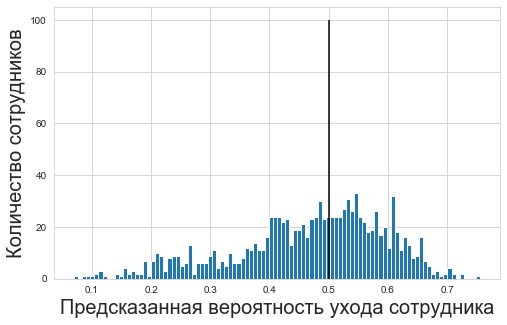

In [274]:
plt.figure(figsize=(8, 5))

plt.hist(test_probabilities, bins=100)
plt.vlines(0.5, 0, 100)

plt.xlabel('Предсказанная вероятность ухода сотрудника', fontsize=20)
plt.ylabel('Количество сотрудников', fontsize=20);

Распределение сконцентрировано на отрезке от `0` до `0.4` и лишь незначительная часть вероятностей превышает порог `0.5`. Из
этого можно предположить, что классификатор склонен классифицировать все
объекты скорее как `0`, игнорируя метку `1`. Это происходит потому, что меток `1` в обучающей выборке сильно меньше, чем меток `0`.

## *Бонус: Точность и полнота

Метрики **Точность** (*Precision*) и **Полнота** (*Recall*) позволяют по-другому взглянуть на качество работы классификатора. Обе метрики рассчитываются на основе значений **таблицы сопряжённости**.

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=1Q3zfGLnyEYJmZbfVxKXoxpsndmoLwd7K" 
alt="IMAGE ALT TEXT HERE" width="500" border="0" /></a>


Несмотря на то, что в английском языке слова *accuracy* и *precision*
синонимы, они соответствуют принципиально разным метрикам. В русском языке
оба слова переводятся как "точность".

Для начала получим матрицу сопряженности для классификатора на основе случайного леса:

In [275]:
confusion_matrix_reg = confusion_matrix(test_values,  test_predictions_logistic_regression)

|                   |  Предсказано `0` |  Предсказано `1` |
|-------------------|------------------|------------------|
|**Фактически** `0` |       TN         |       FP         |
|**Фактически** `1` |       FN         |       TP         | 

Выделим каждое значение в отдельную переменную:

In [276]:
TN, FP = confusion_matrix_reg[0, 0], confusion_matrix_reg[0, 1]

FN, TP = confusion_matrix_reg[1, 0], confusion_matrix_reg[1, 1]

Полнота (**Recall**) классификатора равна доли истинно положительных срабатываний **TPR**
(отношение $\frac{TP}{TP + FN}$). Эту характеристику можно интерпретировать, как
"чувствительность" классификатора к объектам класса `1`. Чем ближе к $100\%$, тем
реже классификатор "пропускает" положительный объект (в данном случае истинного класса `1`).

In [277]:
recall = TP / (TP + FN)

print("Полнота: %.2f%%" % (100 * recall))

Полнота: 62.98%


Точность классификатора (**Precision**) -- это отношение $\frac{TP}{TP + FP}$. Оно отражает,
насколько разборчиво классификатор присваивает метки положительного класса `1`. Чем выше этот показатель,
тем "реже" объекты, помеченные как `1`, являются на самом деле примерами из класса `0`.

In [278]:
precision = TP / (TP + FP)

print("Точность: %.2f%%" % (100 * precision))

Точность: 22.66%


Классификатор с высокой полнотой, но низкой точностью срабатывает очень
часто, однако при этом большинство результатов ошибочны (много ложных
срабатываний).

Наоборот, если у классификатора низкая полнота, но высокая точность,
то он срабатывает достаточно редко, но при этом почти безошибочно определяет
объекты класса `1` (много пропущенных объектов, ложное "бездействие").

### Кривая precision-recall

В пространстве **precision-recall** можно построить кривую, аналогичную **ROC**-кривой. Она также отражает зависимость метрик от порога классификации и косвенно друг от друга. В **sklearn** для построения этой кривой есть функция **precision_recall_curve()**<br/>

Получим координаты точек кривой **PR** для тестового набора данных, для этого функции **precision_recall_curve()** нужно передать два аргумента: 
* истинные значения - *test_values*
* предсказанные вероятности - *test_probabilities*

In [279]:
precision, recall = precision_recall_curve(test_values, test_probabilities)

ValueError: too many values to unpack (expected 2)

Нарисуем кривую precision-recall:

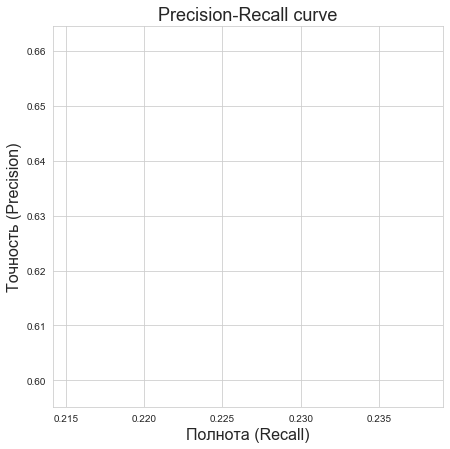

In [280]:
plt.figure(figsize=(7, 7))

plt.plot(precision, recall, color='darkorange')

plt.title('Precision-Recall curve', fontsize=18)
plt.xlabel('Полнота (Recall)', fontsize=16)
plt.ylabel('Точность (Precision)', fontsize=16)

plt.show()

Чем ближе кривая **PR** к **правому верхнему** углу тем лучше качество классификации.

Площадь под **precision-recall** рассчитывается отдельной функцией **average_precision_score()**:

In [281]:
pr_auc_value = average_precision_score(test_values, test_probabilities)

print("PR-AUC на тестовой выборке:", pr_auc_value) 

PR-AUC на тестовой выборке: 0.29895080568926713


Большая площадь под кривой отражает высокие метрики точности и полноты,
что означает низкое число ложных срабатываний, и низкое число пропущенных
объектов интересующего нас класса `1`.

Также нарисуем ROC кривую классификатора.

In [282]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, test_probabilities)

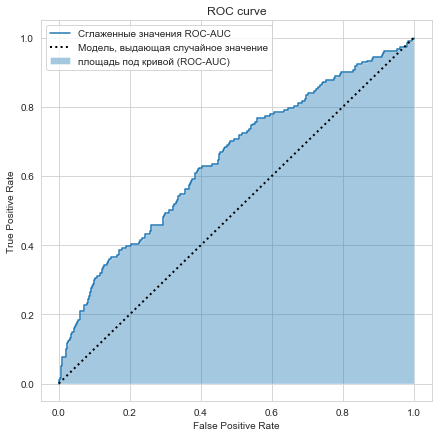

In [283]:
# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [284]:
from sklearn.metrics import roc_auc_score

In [285]:
roc_auc_value = roc_auc_score(test_values, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value) 

ROC-AUC на тестовой выборке: 0.6472186729533717


Типичная шкала для **ROC-AUC** (часто все зависит от задачи):
* $0.90$ - $1.00$ отлично;
* $0.80$ - $0.90$ хорошо;
* $0.70$ - $0.80$ удовлетворительно;
* $0.60$ - $0.70$ плохо;
* $0.50$ - $0.60$ очень плохо;
* $0.00$ - $0.50$ классификатор перепутал метки.

## *Бонус 2: Определение важности признаков

Очевидно, что не все собранные признаки будут одинаково полезны. После обучения алгоритма мы можем посмотреть какие из признаков больше влияют на результат. Если в наборе данных окажутся бесполезные признаки, то их можно удалить, чтобы уменьшить время обучения. В алгоритмах библиотеки **sklearn** посмотреть на важность признаков можно с помощью свойства **feature_importances_**

In [286]:
importances = logistic_regression_model.coef_.flatten()
indices = np.argsort(importances)[::-1]

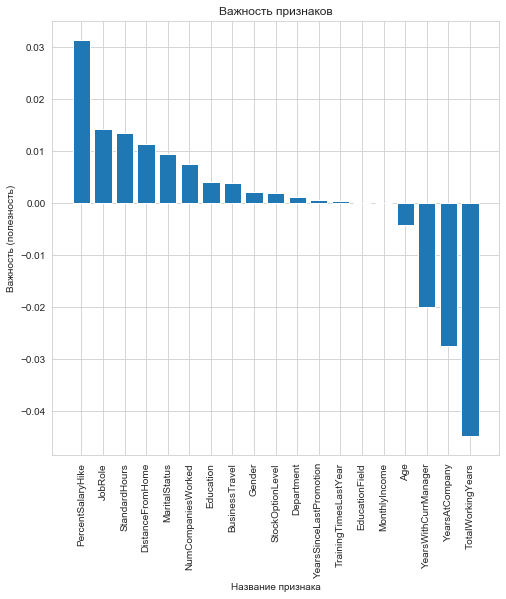

In [287]:
plt.figure(figsize=(8, 8))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(training_points.columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

In [104]:
### Попробуем сбалансировать выборку

In [291]:
df_majority = training_data.loc[training_data.Attrition==0]
df_minority = training_data.loc[training_data.Attrition==1]
df_majority

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,Healthcare Representative,Married,131160,1.0,11,8,0,1.0,6,1,0,0,0
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,Human Resources,Married,83210,3.0,11,8,3,13.0,5,8,7,5,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,Sales Executive,Single,23420,4.0,12,8,2,9.0,2,6,0,4,0
5,46,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,Research Director,Married,40710,3.0,13,8,0,28.0,5,7,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,36,Travel_Rarely,Sales,10,4,Marketing,Male,Manager,Married,86860,1.0,13,8,0,18.0,2,18,4,11,0
3304,32,Travel_Rarely,Research & Development,3,4,Medical,Female,Sales Executive,Divorced,30380,2.0,20,8,0,8.0,3,5,0,3,0
3305,30,Travel_Frequently,Research & Development,4,5,Medical,Male,Sales Representative,Divorced,30580,9.0,14,8,1,10.0,2,5,0,3,0
3306,53,Travel_Rarely,Sales,6,3,Marketing,Male,Sales Executive,Married,23250,7.0,18,8,1,35.0,1,5,0,4,0


In [289]:
print(training_data.columns.tolist())

['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [290]:
df_minority

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,Research Scientist,Single,41890,0.0,23,8,1,6.0,3,5,1,4,1
6,28,Travel_Rarely,Research & Development,11,2,Medical,Male,Sales Executive,Single,58130,2.0,20,8,1,5.0,2,0,0,0,1
13,47,Non-Travel,Research & Development,1,1,Medical,Male,Research Scientist,Married,57620,1.0,11,8,2,10.0,4,10,9,9,1
28,44,Travel_Frequently,Research & Development,1,2,Medical,Male,Research Scientist,Divorced,103330,3.0,14,8,1,19.0,2,1,0,0,1
30,26,Travel_Rarely,Research & Development,4,3,Medical,Male,Research Scientist,Divorced,68540,2.0,11,8,0,5.0,5,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,58,Travel_Rarely,Research & Development,24,3,Other,Female,Research Scientist,Single,43170,7.0,17,8,0,40.0,2,31,13,8,1
3280,28,Travel_Rarely,Research & Development,19,4,Medical,Female,Sales Executive,Single,32040,6.0,16,8,1,5.0,4,2,2,1,1
3289,49,Travel_Rarely,Sales,7,2,Life Sciences,Female,Healthcare Representative,Married,89980,1.0,14,8,2,9.0,2,9,7,7,1
3290,55,Travel_Rarely,Human Resources,16,3,Technical Degree,Male,Manufacturing Director,Single,43190,4.0,11,8,0,12.0,3,9,7,3,1


In [292]:
#Далее мы создадим новый DataFrame с улучшенным классом меньшинства. Вот шаги:

#Сначала мы разделим наблюдения от каждого класса на разные фреймы данных.
#Далее мы повторно сэмплируем класс меньшинства с заменой , установив количество выборок, соответствующее классу большинства.
#Наконец, мы объединим класс меньшинства с повышенной дискретизацией DataFrame с исходным классом большинства DataFrame.


from sklearn.utils import resample
# Separate majority and minority classes
df_majority = training_data.loc[training_data.Attrition==0]
df_minority = training_data.loc[training_data.Attrition==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2778,    # to match majority class
                                 random_state=0) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled2 = pd.concat([df_majority, df_minority_upsampled])


In [293]:
df_upsampled2

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,Healthcare Representative,Married,131160,1.0,11,8,0,1.0,6,1,0,0,0
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,Human Resources,Married,83210,3.0,11,8,3,13.0,5,8,7,5,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,Sales Executive,Single,23420,4.0,12,8,2,9.0,2,6,0,4,0
5,46,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,Research Director,Married,40710,3.0,13,8,0,28.0,5,7,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,29,Travel_Frequently,Sales,3,2,Marketing,Female,Laboratory Technician,Single,68110,0.0,15,8,1,9.0,2,8,7,7,1
1245,39,Travel_Rarely,Human Resources,1,4,Medical,Male,Sales Executive,Married,36730,3.0,14,8,1,19.0,3,1,0,0,1
2607,31,Travel_Frequently,Research & Development,2,1,Other,Male,Sales Executive,Married,70940,1.0,14,8,1,10.0,2,10,0,8,1
2886,38,Travel_Rarely,Sales,6,4,Life Sciences,Female,Research Scientist,Married,107480,7.0,15,8,0,17.0,3,1,0,0,1


In [294]:
df_minority_upsampled

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1184,29,Travel_Rarely,Research & Development,9,4,Medical,Male,Sales Representative,Married,29960,9.0,25,8,0,4.0,4,2,2,2,1
2192,31,Travel_Frequently,Research & Development,2,2,Medical,Female,Manufacturing Director,Single,53960,7.0,17,8,1,3.0,2,1,0,0,1
69,39,Travel_Rarely,Research & Development,1,1,Medical,Female,Laboratory Technician,Married,42840,4.0,17,8,1,12.0,0,1,0,0,1
1737,24,Travel_Rarely,Research & Development,17,2,Life Sciences,Female,Healthcare Representative,Single,25010,9.0,12,8,0,4.0,3,2,2,0,1
442,58,Travel_Rarely,Sales,9,2,Medical,Female,Sales Executive,Single,59570,4.0,14,8,1,7.0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,29,Travel_Frequently,Sales,3,2,Marketing,Female,Laboratory Technician,Single,68110,0.0,15,8,1,9.0,2,8,7,7,1
1245,39,Travel_Rarely,Human Resources,1,4,Medical,Male,Sales Executive,Married,36730,3.0,14,8,1,19.0,3,1,0,0,1
2607,31,Travel_Frequently,Research & Development,2,1,Other,Male,Sales Executive,Married,70940,1.0,14,8,1,10.0,2,10,0,8,1
2886,38,Travel_Rarely,Sales,6,4,Life Sciences,Female,Research Scientist,Married,107480,7.0,15,8,0,17.0,3,1,0,0,1


In [295]:
#обучить другую модель на сбалансированном наборе данных -2 балла
#Задание - сбалансировать по меньшинству, проверить результат -1 балл
#ИспОльзовать для балансировки метод Smote -2 балла  https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html


In [296]:
target_variable_name = 'Attrition'
training_values = df_upsampled2[target_variable_name]
training_values.value_counts()

1    2778
0    2778
Name: Attrition, dtype: int64

In [297]:
training_points = df_upsampled2.drop(target_variable_name, axis=1)
training_points.shape

(5556, 19)

In [298]:
text_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
dummies = pd.get_dummies(data=training_points, columns=text_features)
dummies.head()
print(training_points.shape)
print(dummies.shape)

(5556, 19)
(5556, 39)


In [299]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [300]:
for col in text_features:
    training_points[col] = label_encoder.fit_transform(training_points[col]) + 1
    test_points[col] = label_encoder.fit_transform(test_points[col]) + 1
training_points.head()
training_points.shape

(5556, 19)

In [301]:
from sklearn import linear_model
logistic_regression_model = linear_model.LogisticRegression() # создаем модель
logistic_regression_model # смотрим, что получилось
logistic_regression_model.fit(training_points, training_values)
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)
test_predictions_logistic_regression

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [302]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_values, test_predictions_logistic_regression))
print(accuracy_score(test_values, np.zeros_like(test_values)))
pd.value_counts(test_predictions_logistic_regression)

0.8357531760435571
0.8357531760435571


0    1102
dtype: int64

In [303]:
from sklearn.metrics import confusion_matrix
reg_confusion_matrix = confusion_matrix(test_values, test_predictions_logistic_regression)
reg_confusion_matrix = pd.DataFrame(reg_confusion_matrix)

reg_confusion_matrix

,0,1
0,921,0
1,181,0


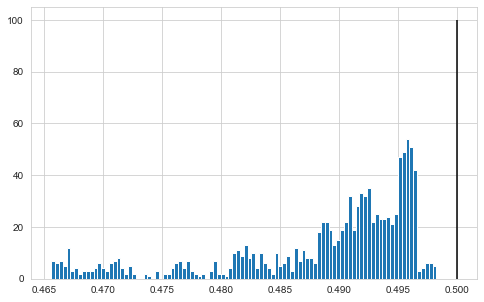

In [304]:
test_probabilities = logistic_regression_model.predict_proba(test_points)
test_probabilities[:5, :]
test_probabilities = test_probabilities[:, 1]
plt.figure(figsize=(8, 5))

plt.hist(test_probabilities, bins=100)
plt.vlines(0.5, 0, 100)

Полнота: 0.00%


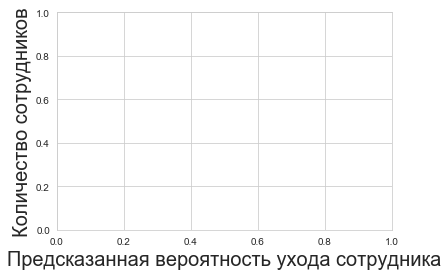

In [305]:
plt.xlabel('Предсказанная вероятность ухода сотрудника', fontsize=20)
plt.ylabel('Количество сотрудников', fontsize=20);
confusion_matrix_reg = confusion_matrix(test_values,  test_predictions_logistic_regression)
TN, FP = confusion_matrix_reg[0, 0], confusion_matrix_reg[0, 1]

FN, TP = confusion_matrix_reg[1, 0], confusion_matrix_reg[1, 1]

recall = TP / (TP + FN)

print("Полнота: %.2f%%" % (100 * recall))

In [306]:
pr_auc_value = average_precision_score(test_values, test_probabilities)

print("PR-AUC на тестовой выборке:", pr_auc_value)
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, test_probabilities)


PR-AUC на тестовой выборке: 0.17845503062676504


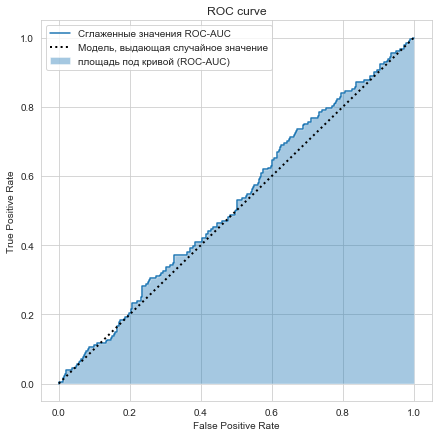

ROC-AUC на тестовой выборке: 0.5206687422390988


In [307]:
# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_value = roc_auc_score(test_values, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value)  

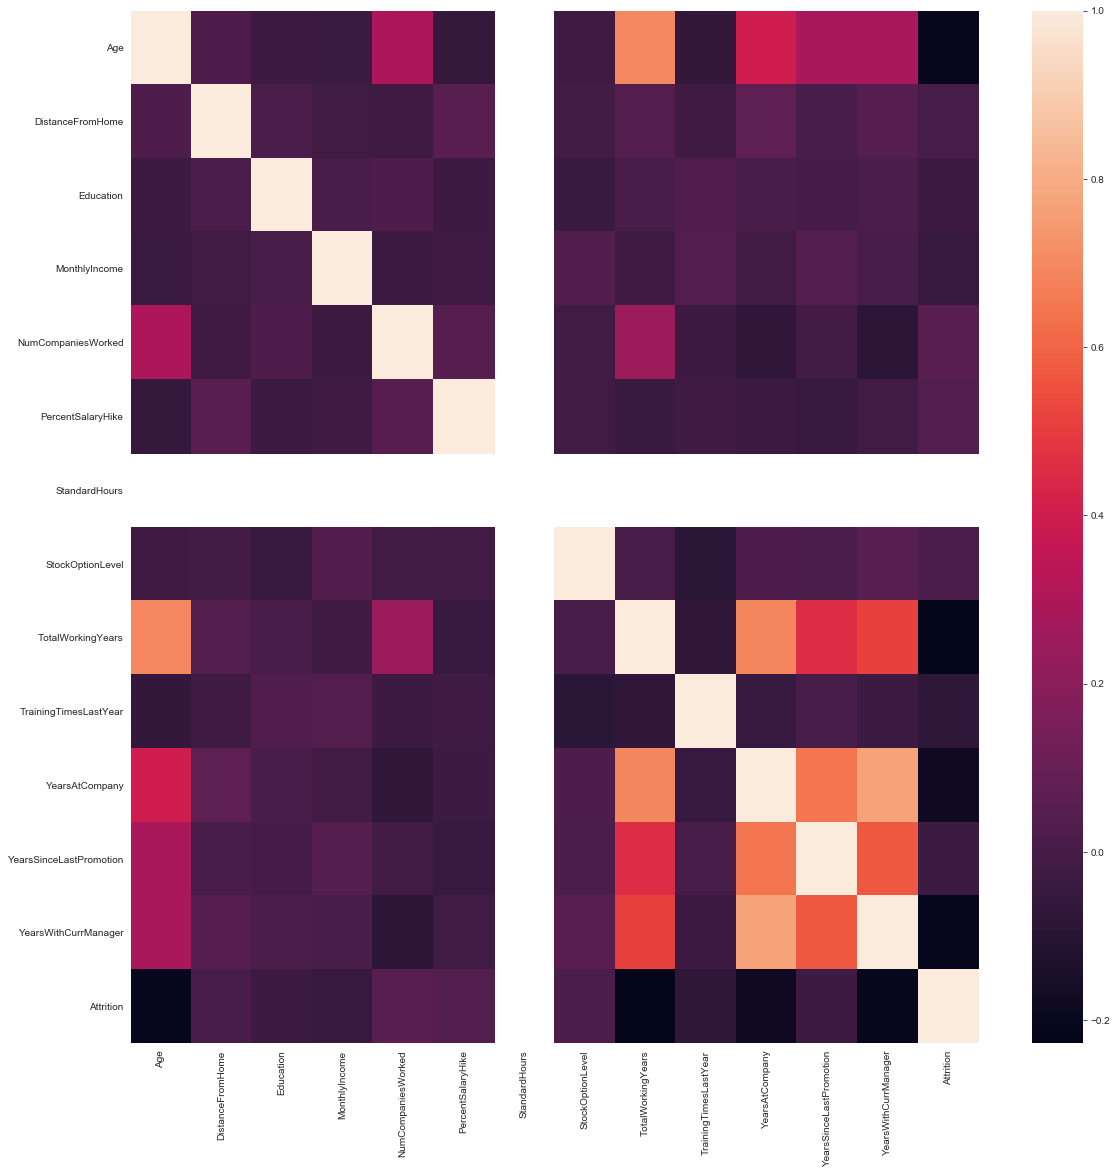

In [308]:
plt.figure(figsize=(19,19))
sns.heatmap(df_upsampled2.corr())